In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

# Enter path to the data_fusion_guest_lecture file
image_folder_path = "data"  

# Loads labels
df = pd.read_csv(os.path.join(image_folder_path, "seedling_labels.csv"))

# Creates path to top & side view
df["color_cam_path"] = image_folder_path + "/" + df["color_cam_path"]
df["side_cam_path"] = image_folder_path + "/" + df["side_cam_path"]

# Gives average expert label as a starting point
df["average_expert"] = (df["Expert 1"] + df["Expert 2"]  + df["Expert 3"] + df["Expert 4"]) / 4
print('Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).')

df

Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).


,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50
...,...,...,...,...,...,...,...,...,...
989,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00
990,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00
991,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00
992,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75


## Generate a score using Cohen Kappa for each expert

In [31]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from collections import Counter
experts = ["Expert 1", "Expert 2", "Expert 3", "Expert 4" ]
expert_Kappas=[[],[],[],[]]
weights = []
labels = []
i=0 
j=0

for i in range(len(experts)):
    for j in range(len(experts)):
        if i!=j:
            ratings = [df[experts[i]].values.tolist(),df[experts[j]].values.tolist()]
            kappa = cohen_kappa_score(ratings[0],ratings[1])
            expert_Kappas[i].append(kappa)

for kappa in expert_Kappas:
    weights.append(np.sum(kappa)/3)
votes = df[["Expert 1", "Expert 2","Expert 3", "Expert 4"]].values.tolist()    
for vote in votes:
    weighted_votes = Counter()
    for i, vot in enumerate(vote):
        weighted_votes[vot] += weights[i]

    # get the winner(s) of the vote
    winners = [vote for vote, count in weighted_votes.items() if count == max(weighted_votes.values())]
    labels.append(winners[0])
    
df["labels"]  = labels
# Round so we can replace
df['average_expert_rounded'] = df['average_expert'].round(0).astype(np.int64)

In [32]:
df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert,labels,average_expert_rounded
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00,4,4
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00,1,1
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00,1,1
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50,3,4
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50,1,2
...,...,...,...,...,...,...,...,...,...,...,...
989,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00,1,1
990,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00,1,1
991,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00,1,1
992,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75,3,3


In [33]:
# create a Boolean DataFrame indicating where the two columns are equal
equal_df = df["labels"].eq(df["average_expert_rounded"])

# calculate the percentage of differences
diff_percentage = 100 - (equal_df.sum() / equal_df.count() * 100)

print(f"The percentage of differences between the two columns is: {diff_percentage:.2f}%")

diff_count = (~equal_df).sum()

print(f"The number of differences between the two columns is: {diff_count}")

The percentage of differences between the two columns is: 7.55%
The number of differences between the two columns is: 75


## Convert (1,2 = normal, 3,4 = abnormal) because it will be binary classification

In [35]:
# 0 = normal
# 1 = abnormal

df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']].replace({1: 0, 2: 0})
df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']].replace([3,4], 1)

df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert,labels,average_expert_rounded
0,1,1,1,1,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,1.00,1,4
1,0,0,0,0,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,0.00,0,1
2,0,0,0,0,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,0.00,0,1
3,1,1,1,1,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50,1,4
4,1,0,0,0,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,0.00,0,1
990,0,0,0,0,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,0.00,0,1
991,0,0,0,0,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,0.00,0,1
992,0,1,1,1,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75,1,3


# Select first plant just to show how the images look (just for our intuition)

In [6]:
print(df['color_cam_path'][0])
print(df['color_cam_path'][1])

data/A1/00387 Plant 0000 Plant 0000/18-02-2019 -- 12.31.11,054_Cam_06.png
data/A1/00388 Plant 0001 Plant 0001/18-02-2019 -- 12.31.29,713_Cam_06.png


A1/00387 Plant 0000 Plant 0000   COLOR CAM:


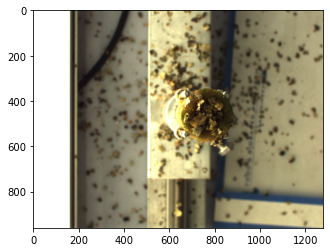

A1/00387 Plant 0000 Plant 0000   SIDE CAM:


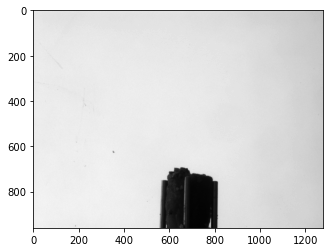

In [7]:
print('A1/00387 Plant 0000 Plant 0000   COLOR CAM:')
img0 = mpimg.imread(df['color_cam_path'][0])
imgplot0 = plt.imshow(img0)
plt.show()

print('A1/00387 Plant 0000 Plant 0000   SIDE CAM:')
img1 = mpimg.imread(df['side_cam_path'][0])
imgplot1 = plt.imshow(img1, cmap='gray')
plt.show()

### Model Training

In [83]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## CNN using transfer learning with MobileNetV2 as the base model
The MobileNetV2 model is used as a feature extractor and then the extracted features are flattened and passed through a few dense layers with dropout before the final classification layer. The model is then trained on the input images using the ```ImageDataGenerator``` to generate batches of augmented images and passed through the model.

###### COLOR CAM, MODEL 1

In [84]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Set up a TensorFlow session to use the GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='color_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='color_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

# load the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# unfreeze the last few layers for fine-tuning
for layer in mobilenet_model.layers[:-4]:
    layer.trainable = False

# build the model
model = tf.keras.models.Sequential([
    mobilenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_generator, epochs=5)

# predict the labels for test data
test_generator.reset()
pred = model.predict(test_generator)

# convert the predictions to binary labels
pred_labels = [1 if p >= 0.5 else 0 for p in pred]

# print the images from each set (train and test) together with their labels and predicted labels
import matplotlib.pyplot as plt

def plot_images(images, labels, pred_labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in range(9):
        axes[i].imshow(images[i])


Found 795 validated image filenames.
Found 199 validated image filenames.
9406464/9406464 [==============================] - 4s 0us/step


Epoch 1/5
100/100 [==============================] - 92s 806ms/step - loss: 2.8164 - accuracy: 0.8113
Epoch 2/5
100/100 [==============================] - 79s 793ms/step - loss: 0.4549 - accuracy: 0.8742
Epoch 3/5
100/100 [==============================] - 78s 781ms/step - loss: 0.3524 - accuracy: 0.8742
Epoch 4/5
100/100 [==============================] - 81s 805ms/step - loss: 0.3392 - accuracy: 0.8956
Epoch 5/5
25/25 [==============================] - 16s 564ms/step


###### Accuracy

In [85]:
# evaluate the model on the test set and print the accuracy
loss, accuracy = model.evaluate(test_generator)
print('Accuracy on test set:', accuracy)

25/25 [==============================] - 16s 558ms/step - loss: 0.2489 - accuracy: 0.9095
Accuracy on test set: 0.909547746181488


###### Plot a few images from each set just for us to look at it

1/1 [==============================] - 0s 219ms/step


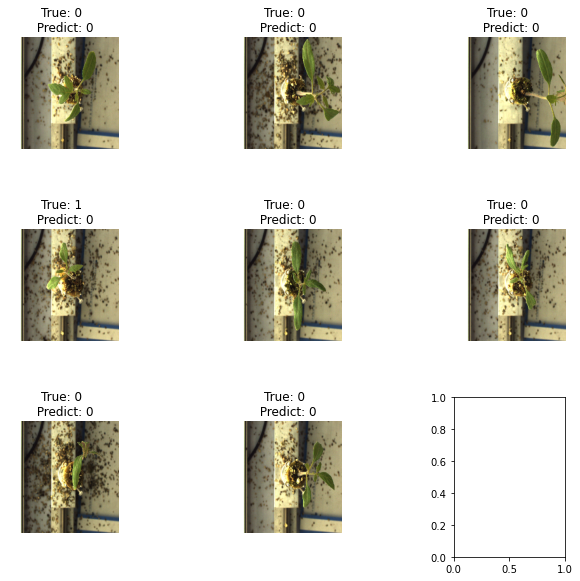

In [87]:
# print the images from each set (train and test) together with their labels and predicted labels
import matplotlib.pyplot as plt

def plot_images(images, labels, pred_labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in range(min(9, len(images))):
        axes[i].imshow(images[i])
        axes[i].set_title("True: %s \n Predict: %s" % (labels[i], pred_labels[i]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace=1)

# get a batch of images from the test set
test_images, test_labels = next(test_generator)

# predict the labels for the test images
test_pred = model.predict(test_images)
test_pred_labels = [1 if p >= 0.5 else 0 for p in test_pred]

# plot the images, labels, and predicted labels
plot_images(test_images, test_labels, test_pred_labels)

###### Save model so it can be used later again without training again

In [92]:
# save the model to a file
model.save('model1_color_cam.h5')

###### SIDE CAM, MODEL 2

In [93]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Set up a TensorFlow session to use the GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='side_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='side_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

# load the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# unfreeze the last few layers for fine-tuning
for layer in mobilenet_model.layers[:-4]:
    layer.trainable = False

# build the model
model = tf.keras.models.Sequential([
    mobilenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_generator, epochs=5)

# predict the labels for test data
test_generator.reset()
pred = model.predict(test_generator)

# convert the predictions to binary labels
pred_labels = [1 if p >= 0.5 else 0 for p in pred]

# print the images from each set (train and test) together with their labels and predicted labels
import matplotlib.pyplot as plt

def plot_images(images, labels, pred_labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in range(9):
        axes[i].imshow(images[i])


Found 795 validated image filenames.
Found 199 validated image filenames.


Epoch 1/5
100/100 [==============================] - 78s 624ms/step - loss: 1.7126 - accuracy: 0.8742
Epoch 2/5
100/100 [==============================] - 58s 577ms/step - loss: 0.2894 - accuracy: 0.9019
Epoch 3/5
100/100 [==============================] - 53s 529ms/step - loss: 0.2663 - accuracy: 0.9233
Epoch 4/5
100/100 [==============================] - 58s 577ms/step - loss: 0.2193 - accuracy: 0.9283
Epoch 5/5
25/25 [==============================] - 15s 473ms/step


###### Accuracy

In [94]:
# evaluate the model on the test set and print the accuracy
loss, accuracy = model.evaluate(test_generator)
print('Accuracy on test set:', accuracy)

25/25 [==============================] - 17s 350ms/step - loss: 0.6707 - accuracy: 0.8995
Accuracy on test set: 0.8994975090026855


###### Plot a few images from each set just for us to look at it

1/1 [==============================] - 2s 2s/step


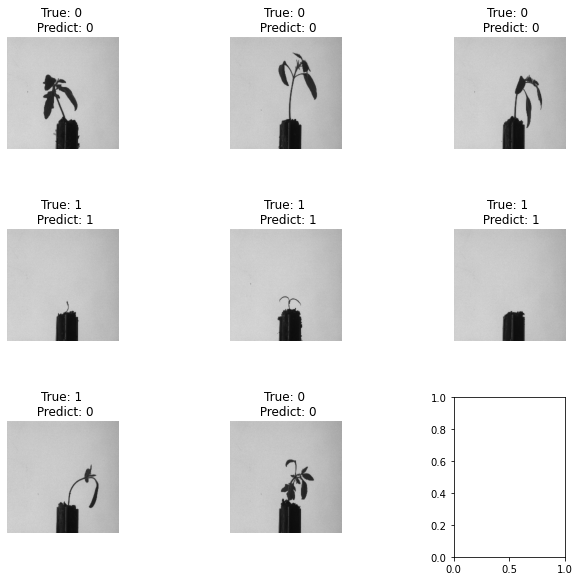

In [95]:
# print the images from each set (train and test) together with their labels and predicted labels
import matplotlib.pyplot as plt

def plot_images(images, labels, pred_labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in range(min(9, len(images))):
        axes[i].imshow(images[i])
        axes[i].set_title("True: %s \n Predict: %s" % (labels[i], pred_labels[i]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace=1)

# get a batch of images from the test set
test_images, test_labels = next(test_generator)

# predict the labels for the test images
test_pred = model.predict(test_images)
test_pred_labels = [1 if p >= 0.5 else 0 for p in test_pred]

# plot the images, labels, and predicted labels
plot_images(test_images, test_labels, test_pred_labels)

###### Save model so it can be used later again without training again

In [96]:
# save the model to a file
model.save('model2_side_cam.h5')

#### TO LOAD THE MODEL (DO NOT TRAIN IT AGAIN UNLESS YOU WANT TO WAIT)

In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model('model1_color_cam.h5')
model2 = load_model('model3_side_cam.h5')
